<h1>Time Series Querying (II)</h1>

Import emsPy.

In [13]:
from emspy import Connection
from emspy.query import FltQuery
from emspy.query import TSeriesQuery

Import getpass for handling passwords. 

In [14]:
import getpass

Import other packages. 

In [15]:
import pandas as pd
import numpy as np

Set up credentials. 

In [16]:
#-- Original --#
# efoqa_user = input('Enter Username:')
# efoqa_pass = getpass.getpass('Enter Password:')
#--------------#

efoqa_user = 'jeffrey.okogbaa'
efoqa_pass = 'Footballsd8973!'

Define a system. 

In [17]:
server_url = 'https://oae-api.us.efoqa.com/api'

Create a connection.

In [18]:
c = Connection(user=efoqa_user, pwd=efoqa_pass, server_url=server_url)

<h3>Multi Time Series Query with Specified Start and End</h3>

In [19]:
tsq = TSeriesQuery(c, 1, data_file='tsData_multi.db')

Specify the parameters you want to search for.  `tsq.select()` will take as many parameters as you give it.

In [20]:
tsq.select("baro-corrected altitude", "pressure altitude", "airspeed (calibrated; 1 or only)", "ground speed (best avail)")

In [21]:
flights = [235488, 235489, 235490, 235492]

In [22]:
res_dat = tsq.multi_run(flights)


=== Start running time-series data querying for 4 flights ===

4 / 4: FR 235492 Done


In [23]:
print('tsq.multi_run() returns an object of type: ', type(res_dat))
# print the first element in the res_dat list
print('The first element of res_dat is of type: ', type(res_dat[0]) )
print('The keys of res_dat[0] are: ', res_dat[0].keys(), '\n')

print("res_dat[0]['flt_data']:")
print(res_dat[0]['flt_data'])
print()
print("res_dat[0]['ts_data'].head(3):")
display(res_dat[0]['ts_data'].head(3))

tsq.multi_run() returns an object of type:  <class 'list'>
The first element of res_dat is of type:  <class 'dict'>
The keys of res_dat[0] are:  dict_keys(['flt_data', 'ts_data']) 

res_dat[0]['flt_data']:
{'Flight Record': 235488}

res_dat[0]['ts_data'].head(3):


,Time (sec),Baro-Corrected Altitude (ft),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
0,0.0,116.993806,80.0,0.0,2.0
1,1.0,116.993806,80.0,0.0,0.0
2,2.0,116.993806,80.0,0.0,0.0


Illustration of the above: 

![test](notebook_images/res_dat.JPG)

In [24]:
print(res_dat[3]['flt_data']['Flight Record'])
display(res_dat[3]['ts_data'].head(10))

235492


,Time (sec),Baro-Corrected Altitude (ft),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
0,0.0,5380.264212,5482.0,0.0,0.0
1,1.0,5380.264212,5482.0,0.0,0.0
2,2.0,5381.264212,5483.0,0.0,0.0
3,3.0,5381.264212,5483.0,0.0,0.0
4,4.0,5380.264212,5482.0,0.0,0.0
5,5.0,5381.264212,5483.0,0.0,0.0
6,6.0,5380.264212,5482.0,0.0,0.0
7,7.0,5381.264212,5483.0,0.0,0.0
8,8.0,5381.264212,5483.0,0.0,0.0
9,9.0,5381.264212,5483.0,0.0,0.0


Calculate the mean of all columns in the dataframe at index 4. 

In [25]:
mean = res_dat[3]['ts_data'].mean()
display(mean)

Time (sec)                                   5966.000000
Baro-Corrected Altitude (ft)                29888.863909
Pressure Altitude (ft)                      29856.881830
Airspeed (calibrated; 1 or Only) (knots)      227.493212
Ground Speed (best avail) (knots)             410.013395
dtype: float64

You can access individual values easily: 

In [26]:
mean['Baro-Corrected Altitude (ft)']

29888.863908510008

In [27]:
stats = {}

for res in res_dat:
    fr = res['flt_data']['Flight Record']
    df = res['ts_data']
    stats[fr] = df.mean()

Convert stats (which is a dictionary where each value is a Pandas Series) into a Dataframe.  Display the dataframe. 

In [28]:
stats_df = pd.DataFrame(stats)
display(stats_df)

,235488,235489,235490,235492
Time (sec),4456.000000,5934.000000,6986.000000,5966.000000
Baro-Corrected Altitude (ft),25009.934883,26344.158376,31610.510071,29888.863909
Pressure Altitude (ft),25026.495063,26309.326761,31587.286788,29856.881830
Airspeed (calibrated; 1 or Only) (knots),223.769749,234.322169,238.948433,227.493212
Ground Speed (best avail) (knots),361.732638,327.990921,357.250728,410.013395


That looks gross.  Transpose it. 

In [29]:
stats_df = stats_df.T

In [30]:
display(stats_df)

,Time (sec),Baro-Corrected Altitude (ft),Pressure Altitude (ft),Airspeed (calibrated; 1 or Only) (knots),Ground Speed (best avail) (knots)
235488,4456.0,25009.934883,25026.495063,223.769749,361.732638
235489,5934.0,26344.158376,26309.326761,234.322169,327.990921
235490,6986.0,31610.510071,31587.286788,238.948433,357.250728
235492,5966.0,29888.863909,29856.881830,227.493212,410.013395


<h3>Plotting</h3>

There are ***a ton*** of plotting libraries in Python. It was one of the first, and many other plotting libraries in Python are built on top of the Matplotlib interface. 

It is notoriously hard to work with.  I highly recommend researching other visualization libraries on your own.  

1. bokeh
2. seaborn
3. holoviews
4. plotly 
5. dash (made by the same people as plotly) - Python based dashboarding tool

Simple way: ***use built in pandas plotting methods!!!***

In [31]:
import matplotlib.pyplot as plt

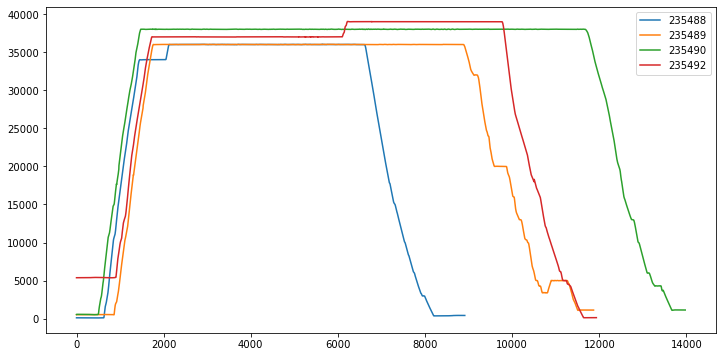

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))

for entry in res_dat:
    ts_data = entry['ts_data']
    ax.plot(ts_data['Time (sec)'], ts_data['Baro-Corrected Altitude (ft)'], label=entry['flt_data']['Flight Record'])
    
ax.legend()

<h3>Plotting with Start/End</h3>

Define `flights`, `starts`, and `ends`, which we will use to grab the time series values. 

You can imagine these values coming from a previous database query. 

E.g. `flights` could be flight records that had some event, and `starts`, and `ends`, could be the starting times and ending times of these events. 

In [33]:
flights = [235488, 235489, 235490, 235492]
starts = [50, 60, 70, 80]
ends = [70, 80, 90, 100]

In [34]:
res_dat = tsq.multi_run(flights, start=starts, end=ends)


=== Start running time-series data querying for 4 flights ===

4 / 4: FR 235492 Done


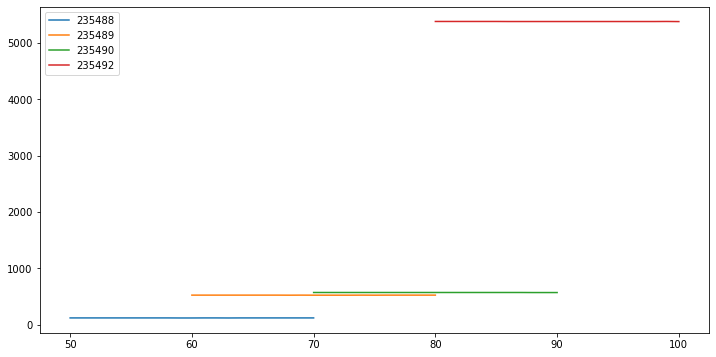

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))

for entry in res_dat:
    ts_data = entry['ts_data']
    ax.plot(ts_data['Time (sec)'], ts_data['Baro-Corrected Altitude (ft)'], label=entry['flt_data']['Flight Record'])
    
ax.legend()